In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates[0]

(75.50343354253556, 114.83061134282195)

In [5]:
x=coordinates[0]
x[0]

75.50343354253556

---
# 6.1.5 Generate Random World Cities
---

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

---
# 6.2.6 Get the City Weather Data
---

#### Import Dependencies, and Initialize an Empty List and Counters

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | victor harbor
Processing Record 3 of Set 1 | moron
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | provideniya
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | guerrero negro
Processing Record 8 of Set 1 | puerto escondido
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | coquimbo
Processing Record 13 of Set 1 | mineiros
Processing Record 14 of Set 1 | ulaangom
Processing Record 15 of Set 1 | shulan
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 18 of Set 1 | vaitape
Processing Record 19 of Set 1 | richards bay
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | buin
Processing Record 22 of Set 1 | castro
Proc

Processing Record 40 of Set 4 | kiama
Processing Record 41 of Set 4 | mut
Processing Record 42 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 43 of Set 4 | tambacounda
Processing Record 44 of Set 4 | sao filipe
Processing Record 45 of Set 4 | snezhnogorsk
Processing Record 46 of Set 4 | merauke
Processing Record 47 of Set 4 | kenai
Processing Record 48 of Set 4 | beringovskiy
Processing Record 49 of Set 4 | kyren
Processing Record 50 of Set 4 | husavik
Processing Record 1 of Set 5 | buchanan
Processing Record 2 of Set 5 | saleaula
City not found. Skipping...
Processing Record 3 of Set 5 | kahului
Processing Record 4 of Set 5 | broome
Processing Record 5 of Set 5 | shumskiy
Processing Record 6 of Set 5 | portland
Processing Record 7 of Set 5 | ixtapa
Processing Record 8 of Set 5 | nantucket
Processing Record 9 of Set 5 | tiksi
Processing Record 10 of Set 5 | villa carlos paz
Processing Record 11 of Set 5 | kaitangata
Processing Record 12 of Set 5 | talladega
Proc

Processing Record 27 of Set 8 | bairiki
Processing Record 28 of Set 8 | maumere
Processing Record 29 of Set 8 | mackay
Processing Record 30 of Set 8 | ruwi
Processing Record 31 of Set 8 | teeli
Processing Record 32 of Set 8 | muncar
Processing Record 33 of Set 8 | thompson
Processing Record 34 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 35 of Set 8 | kampong chhnang
Processing Record 36 of Set 8 | college
Processing Record 37 of Set 8 | chuy
Processing Record 38 of Set 8 | shanghai
Processing Record 39 of Set 8 | ucluelet
Processing Record 40 of Set 8 | bokspits
City not found. Skipping...
Processing Record 41 of Set 8 | llata
Processing Record 42 of Set 8 | mocuba
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | kjollefjord
Processing Record 45 of Set 8 | odweyne
Processing Record 46 of Set 8 | taywarah
Processing Record 47 of Set 8 | aloleng
Processing Record 48 of Set 8 | muroto
Processing Record 49 of Set 8 | great bend
Processing Recor

Processing Record 14 of Set 12 | cururupu
Processing Record 15 of Set 12 | saint george
Processing Record 16 of Set 12 | salalah
Processing Record 17 of Set 12 | bosaso
Processing Record 18 of Set 12 | ajdabiya
Processing Record 19 of Set 12 | sciacca
Processing Record 20 of Set 12 | elko
Processing Record 21 of Set 12 | taoudenni
Processing Record 22 of Set 12 | krasnoye
Processing Record 23 of Set 12 | itoman
Processing Record 24 of Set 12 | khudumelapye
Processing Record 25 of Set 12 | tautira
Processing Record 26 of Set 12 | ibajay
Processing Record 27 of Set 12 | matamoros
Processing Record 28 of Set 12 | khasan
Processing Record 29 of Set 12 | aguilar de la frontera
Processing Record 30 of Set 12 | tucumcari
Processing Record 31 of Set 12 | kattivakkam
Processing Record 32 of Set 12 | tocache
Processing Record 33 of Set 12 | jiujiang
Processing Record 34 of Set 12 | ponerihouen
Processing Record 35 of Set 12 | taft
Processing Record 36 of Set 12 | labytnangi
Processing Record 37 

In [11]:
len(city_data)

577

In [12]:
city_data[432]

{'City': 'Zhicheng',
 'Lat': 30.2956,
 'Lng': 111.5047,
 'Max Temp': 52,
 'Humidity': 84,
 'Cloudiness': 100,
 'Wind Speed': 5.44,
 'Country': 'CN',
 'Date': '2021-04-02 18:00:56'}

---
# 6.2.7 Create a DataFrame of City Weather Data
---

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,-37.93,100,50,3.27,RU,2021-04-02 17:58:30
1,Victor Harbor,-35.5667,138.6167,72.00,38,0,6.06,AU,2021-04-02 17:58:30
2,Moron,-34.6534,-58.6198,75.99,50,82,5.01,AR,2021-04-02 17:58:30
3,Mataura,-46.1927,168.8643,46.00,86,57,4.00,NZ,2021-04-02 17:58:31
4,Provideniya,64.3833,-173.3000,10.40,93,100,16.17,RU,2021-04-02 17:58:31
5,Barrow,71.2906,-156.7887,-20.20,76,90,5.75,US,2021-04-02 17:58:31
6,Guerrero Negro,27.9769,-114.0611,66.65,55,16,14.38,MX,2021-04-02 17:58:32
7,Puerto Escondido,15.8500,-97.0667,86.00,74,1,7.99,MX,2021-04-02 17:58:32
8,Hithadhoo,-0.6000,73.0833,83.53,77,22,20.04,MV,2021-04-02 17:54:12
9,Cape Town,-33.9258,18.4232,66.99,63,0,6.91,ZA,2021-04-02 17:54:50


In [14]:
# Reorder columns
new_column_order = ['City','Country','Date','Lat','Lng',
                    'Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2021-04-02 17:58:30,71.9167,114.0833,-37.93,100,50,3.27
1,Victor Harbor,AU,2021-04-02 17:58:30,-35.5667,138.6167,72.00,38,0,6.06
2,Moron,AR,2021-04-02 17:58:30,-34.6534,-58.6198,75.99,50,82,5.01
3,Mataura,NZ,2021-04-02 17:58:31,-46.1927,168.8643,46.00,86,57,4.00
4,Provideniya,RU,2021-04-02 17:58:31,64.3833,-173.3000,10.40,93,100,16.17
5,Barrow,US,2021-04-02 17:58:31,71.2906,-156.7887,-20.20,76,90,5.75
6,Guerrero Negro,MX,2021-04-02 17:58:32,27.9769,-114.0611,66.65,55,16,14.38
7,Puerto Escondido,MX,2021-04-02 17:58:32,15.8500,-97.0667,86.00,74,1,7.99
8,Hithadhoo,MV,2021-04-02 17:54:12,-0.6000,73.0833,83.53,77,22,20.04
9,Cape Town,ZA,2021-04-02 17:54:50,-33.9258,18.4232,66.99,63,0,6.91


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

---
# 6.3.1 Plot Latitude vs. Temperature
---

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

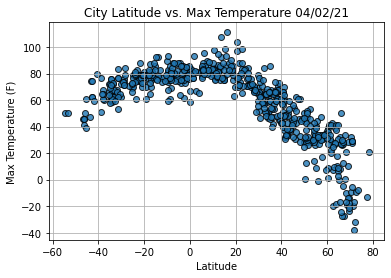

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

---
# 6.3.2 Plot Latitude vs. Humidity
---

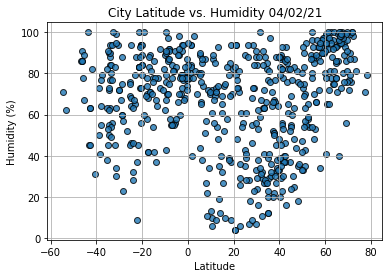

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

---
# 6.3.3 Plot Latitude vs. Cloudiness
---

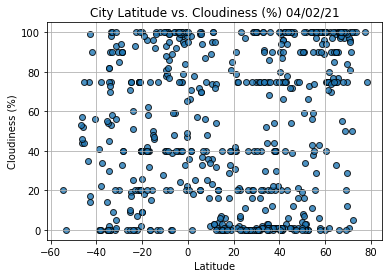

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

---
# 6.3.4 Plot Latitude vs. Wind Speed
---

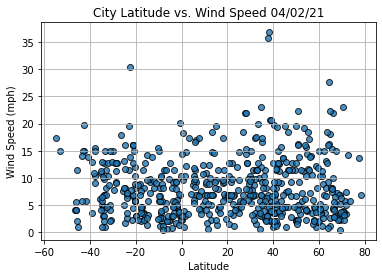

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

---
# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature
---

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                     Ulaangom
Country                        MN
Date          2021-04-02 17:54:36
Lat                       49.9811
Lng                       92.0667
Max Temp                    28.54
Humidity                       47
Cloudiness                      4
Wind Speed                   2.19
Name: 13, dtype: object

In [36]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2021-04-02 17:58:30,71.9167,114.0833,-37.93,100,50,3.27
4,Provideniya,RU,2021-04-02 17:58:31,64.3833,-173.3000,10.40,93,100,16.17
5,Barrow,US,2021-04-02 17:58:31,71.2906,-156.7887,-20.20,76,90,5.75
6,Guerrero Negro,MX,2021-04-02 17:58:32,27.9769,-114.0611,66.65,55,16,14.38
7,Puerto Escondido,MX,2021-04-02 17:58:32,15.8500,-97.0667,86.00,74,1,7.99


In [37]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

#### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

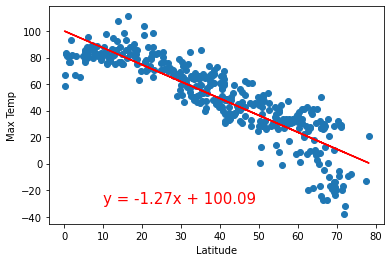

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-30))

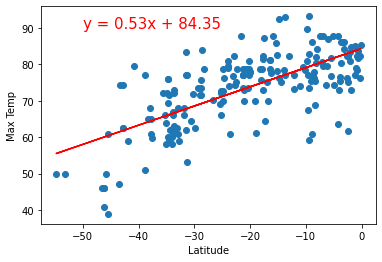

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

---
# 6.4.3 Find the Correlation Between Latitude and Percent Humidity
---

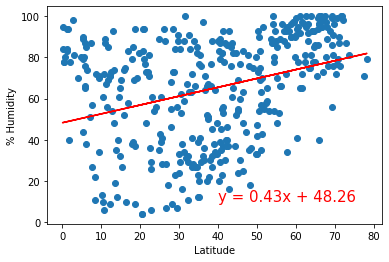

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

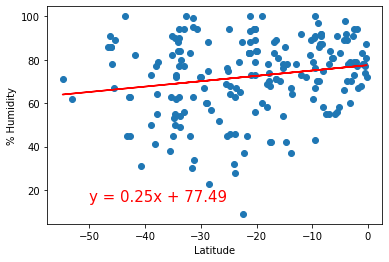

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

---
# 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness
---

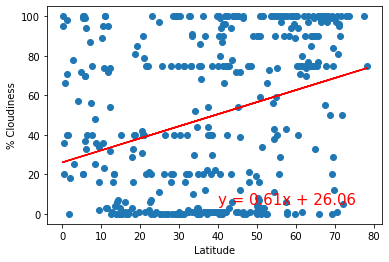

In [51]:
# Linear Regression on the Percent Cloudiness for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,5))

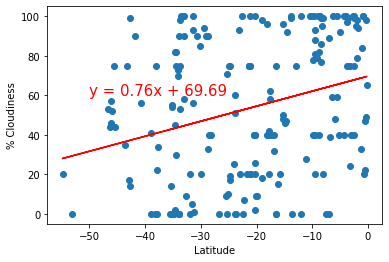

In [53]:
# Linear regression on the Percent Cloudiness for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

---
# 6.4.5 Find the Correlation Between Latitude and Wind Speed
---

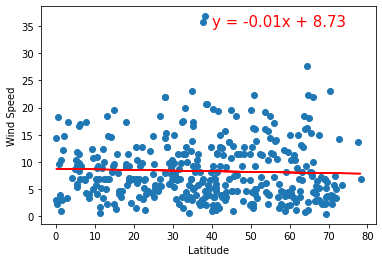

In [55]:
# Linear regression on wind speed for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

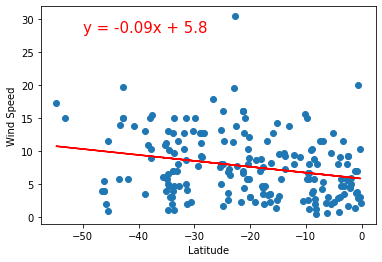

In [57]:
# Linear regression on wind speed for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,28))